
# Modelos Estadísticos

## Diplomado en Técnicas Estadísticas y Minería de Datos

### Examen práctico
### Grupo 36-2025

---
Frida Jaqueline Chávez Arroyo



### Descripción del conjunto de datos
El conjunto de datos `penguins.csv` contiene información morfológica de diferentes especies de pingüinos en el archipiélago Palmer, Antártida.

| Variable             | Descripción                                      |
|----------------------|--------------------------------------------------|
| species              | Especie del pingüino (Adelie, Chinstrap, Gentoo) |
| island               | Isla donde fue observado                         |
| bill_length_mm       | Longitud del pico (mm)                           |
| bill_depth_mm        | Profundidad del pico (mm)                        |
| flipper_length_mm    | Longitud de la aleta (mm)                        |
| body_mass_g          | Masa corporal (g)                                |
| sex                  | Sexo del pingüino                                |

### Instrucciones
Justifica tus respuestas con código, tablas y gráficos según sea necesario.

1. **[0.5 puntos]** Carga el conjunto de datos `penguins.csv`.
- ¿Cuántas observaciones y variables contiene el conjunto?
- ¿Existen valores faltantes?

In [22]:
import seaborn as sns

# Cargar conjunto de datos
df = sns.load_dataset('penguins')

# Vista parcial
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
245,Gentoo,Biscoe,46.1,15.1,215.0,5100.0,Male
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN


¿Cuántas observaciones y variables contiene el conjunto?

In [23]:
filas, columnas= df.shape
print(f'El conjunto de datos tiene {filas} observaciones y {columnas} variables.')

El conjunto de datos tiene 344 observaciones y 7 variables.


¿Existen valores faltantes?

In [24]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


2. **[0.5 puntos]** Clasifica las variables en cuantitativas y cualitativas

In [25]:
cuantitativas = df.select_dtypes(include=['float', 'int']).columns.tolist()
cualitativas = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Cuantitativas:", cuantitativas)
print("Cualitativas:", cualitativas)

Cuantitativas: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Cualitativas: ['species', 'island', 'sex']


3. **[1.5 puntos]** Elimina las observaciones con valores faltantes y calcula para cada especie:
- Rango, desviación estándar y coeficiente de variación (CV)
- Media y mediana
- Coeficiente de asimetría y curtosis
- Construye diagramas de caja y brazos para cada variable por especie e interpreta los resultados

In [26]:
from scipy.stats import skew, kurtosis

df_clean = df.dropna()

agrupado = df_clean.groupby("species")

for especie, grupo in agrupado:
    print(f"\nEspecie: {especie}")
    for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        datos = grupo[col]
        rango = datos.max() - datos.min()
        desviacion = datos.std()
        cv = desviacion / datos.mean()
        media = datos.mean()
        mediana = datos.median()
        asimetria = skew(datos)
        curtosis_val = kurtosis(datos)

        print(f"\n  Variable: {col}")
        print(f"    Rango: {rango:.2f}")
        print(f"    Desviación estándar: {desviacion:.2f}")
        print(f"    Coeficiente de variación (CV): {cv:.2f}")
        print(f"    Media: {media:.2f}")
        print(f"    Mediana: {mediana:.2f}")
        print(f"    Asimetría: {asimetria:.2f}")
        print(f"    Curtosis: {curtosis_val:.2f}")



Especie: Adelie

  Variable: bill_length_mm
    Rango: 13.90
    Desviación estándar: 2.66
    Coeficiente de variación (CV): 0.07
    Media: 38.82
    Mediana: 38.85
    Asimetría: 0.16
    Curtosis: -0.18

  Variable: bill_depth_mm
    Rango: 6.00
    Desviación estándar: 1.22
    Coeficiente de variación (CV): 0.07
    Media: 18.35
    Mediana: 18.40
    Asimetría: 0.31
    Curtosis: -0.07

  Variable: flipper_length_mm
    Rango: 38.00
    Desviación estándar: 6.52
    Coeficiente de variación (CV): 0.03
    Media: 190.10
    Mediana: 190.00
    Asimetría: 0.08
    Curtosis: 0.33

  Variable: body_mass_g
    Rango: 1925.00
    Desviación estándar: 458.62
    Coeficiente de variación (CV): 0.12
    Media: 3706.16
    Mediana: 3700.00
    Asimetría: 0.28
    Curtosis: -0.59

Especie: Chinstrap

  Variable: bill_length_mm
    Rango: 17.10
    Desviación estándar: 3.34
    Coeficiente de variación (CV): 0.07
    Media: 48.83
    Mediana: 49.55
    Asimetría: -0.09
    Curtosis: -0.05


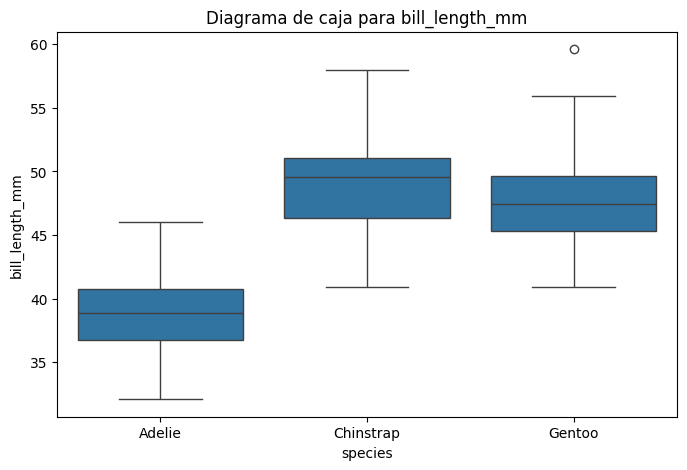

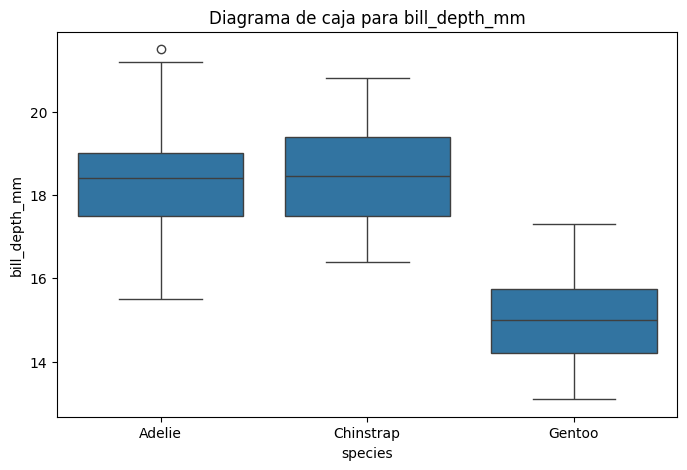

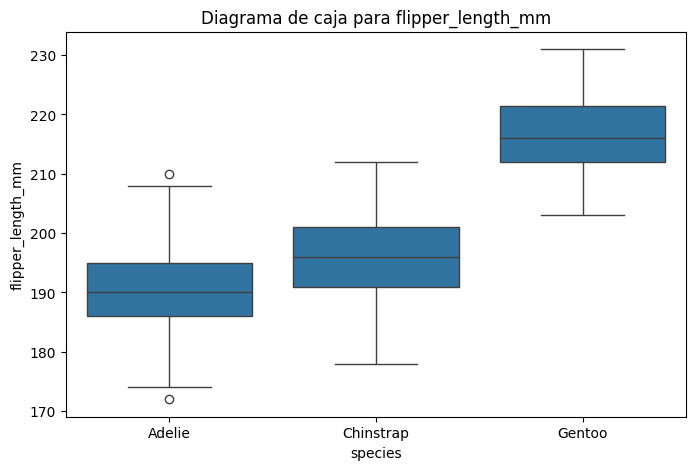

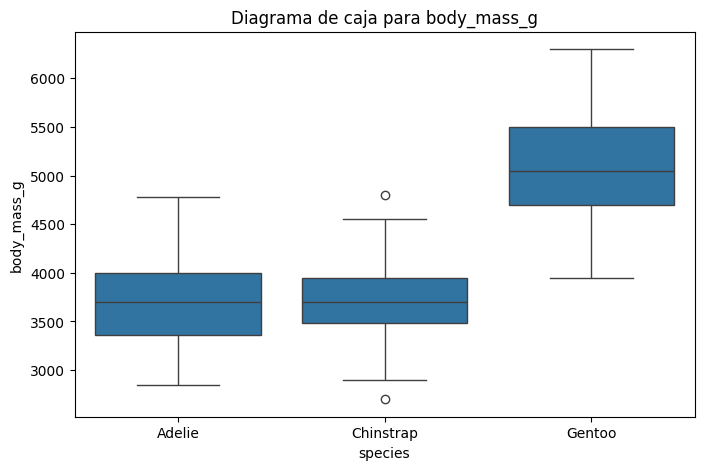

In [27]:
import matplotlib.pyplot as plt
variables_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_clean, x='species', y=col)
    plt.title(f'Diagrama de caja para {col}')
    plt.show()


**Interpretación de los resultados.**

Los diagramas de caja muestran que hay diferencias notables entre las especies de pingüinos en variables como longitud del pico, profundidad del pico y longitud de la aleta. La especie Gentoo se distingue claramente por tener aletas más largas y menor profundidad del pico, mientras que Chinstrap y Adelie tienen diferencias más marcadas en la longitud del pico. Estas variables pueden ser útiles para clasificación de especies y muestran patrones consistentes con diferencias morfológicas entre los grupos.

4. **[1.5 puntos]** Realiza una visualización de pares de variables numéricas (`pairplot`) coloreada por `species`.
- Describe patrones interesantes en las relaciones entre variables.

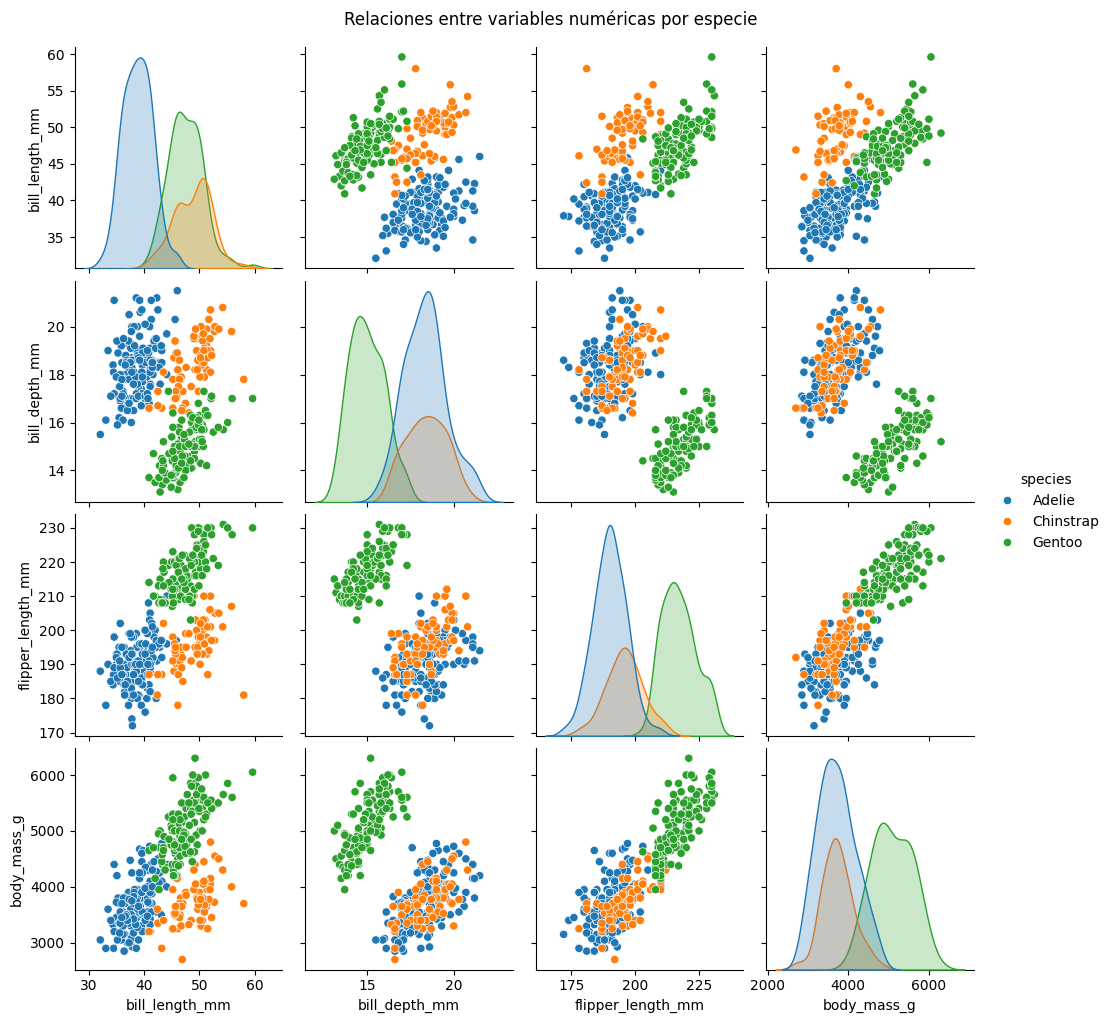

In [28]:
sns.pairplot(df_clean, hue="species", vars=variables_numericas)
plt.suptitle("Relaciones entre variables numéricas por especie", y=1.02)
plt.show()


El diagrama de pares muestra que las variables biométricas como la longitud y profundidad del pico, la longitud de la aleta y la masa corporal permiten distinguir con claridad entre las tres especies de pingüinos. Los pingüinos Gentoo (en verde) destacan por ser consistentemente más grandes en todas las dimensiones, separándose visualmente del resto en casi todos los gráficos. En contraste, aunque los Adelie (azul) y Chinstrap (naranja) presentan tamaños generales más similares, pueden diferenciarse por las proporciones de sus picos: los Chinstrap tienden a tener picos más largos y profundos en relación con su cuerpo que los Adelie. Además, se observan correlaciones positivas entre las variables de tamaño, especialmente entre la longitud de la aleta y la masa corporal, lo cual indica que los pingüinos más grandes en una dimensión tienden a serlo también en las demás.

5. **[1.5 puntos]** ¿Qué variables podrían ser útiles para predecir la masa corporal (`body_mass_g`)?
- Justifica tu respuesta con coeficientes de correlación.

In [29]:
correlaciones = df_clean[variables_numericas].corr()
print("Correlaciones con body_mass_g:")
print(correlaciones["body_mass_g"].sort_values(ascending=False))


Correlaciones con body_mass_g:
body_mass_g          1.000000
flipper_length_mm    0.872979
bill_length_mm       0.589451
bill_depth_mm       -0.472016
Name: body_mass_g, dtype: float64


6. **[1.5 puntos]** Para las observaciones de la especie `Adelie` y del sexo masculino, verifica si la variable `flipper_length_mm` sigue una distribución normal.
- Aplica pruebas visuales
- Aplica pruebas estadísticas

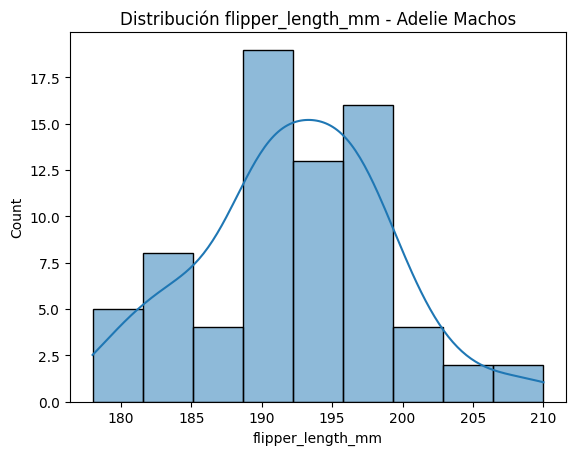

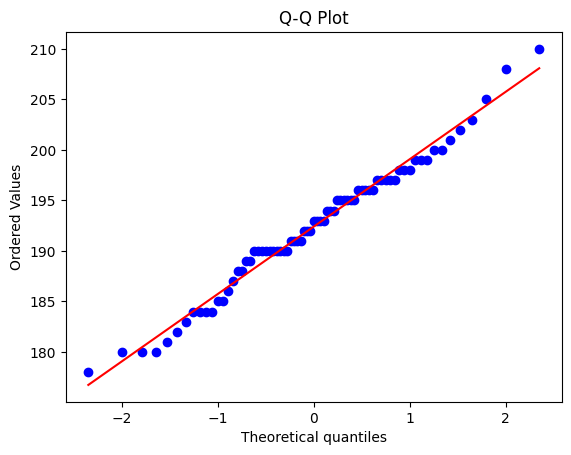

p-valor prueba de normalidad: 0.9170


In [30]:
import scipy.stats as stats
from scipy.stats import normaltest
adelie_macho = df_clean[(df_clean["species"] == "Adelie") & (df_clean["sex"] == "Male")]["flipper_length_mm"]

# Visuales
sns.histplot(adelie_macho, kde=True)
plt.title("Distribución flipper_length_mm - Adelie Machos")
plt.show()

stats.probplot(adelie_macho, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Prueba estadística
stat, p = normaltest(adelie_macho)
print(f"p-valor prueba de normalidad: {p:.4f}")


7. **[1.5 puntos]** Construye un intervalo de confianza del 95% para la media de `flipper_length_mm` para pingüinos `Adelie` machos.

In [31]:
from scipy.stats import t
import numpy as np

n = len(adelie_macho)
media = adelie_macho.mean()
std = adelie_macho.std(ddof=1)
confianza = 0.95
error = std / np.sqrt(n)
t_crit = t.ppf((1 + confianza) / 2, df=n-1)
margen = t_crit * error

print(f"Intervalo de confianza del 95%: ({media - margen:.2f}, {media + margen:.2f})")


Intervalo de confianza del 95%: (190.87, 193.95)


8. **[1.5 puntos]** ¿Puedes afirmar que la longitud de aleta promedio de los pingüinos `Adelie` machos es distinta de la de las hembras?
- Aplica una prueba de hipótesis apropiada y concluye.

In [32]:
from scipy.stats import ttest_ind
adelie_machos = df_clean[(df_clean["species"] == "Adelie") & (df_clean["sex"] == "Male")]["flipper_length_mm"]
adelie_hembras = df_clean[(df_clean["species"] == "Adelie") & (df_clean["sex"] == "Female")]["flipper_length_mm"]

# Prueba t de muestras independientes
stat, p = ttest_ind(adelie_machos, adelie_hembras, equal_var=False)
print(f"p-valor de la prueba t: {p:.4f}")


p-valor de la prueba t: 0.0000
